In [1]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter
from matplotlib.lines import Line2D
import sys

In [7]:
# Functions

def is_given_inputs_feasible(pos_init, pos_des, L): # For a straight-line trajectory
    x0=pos_init[0]
    x1=pos_init[1]
    y0=pos_des[0]
    y1=pos_des[1]
    
    a = y0-y1
    b = -x0+x1
    c = y0*(x0-x1)-(y0-y1)*x0
    d = np.absolute(c)/np.sqrt(a**2+b**2)
    
    if np.linalg.norm(pos_init) > L[0]+L[1] or np.linalg.norm(pos_init) < np.absolute(L[0]-L[1]) \
    or np.linalg.norm(pos_des) > L[0]+L[1] or np.linalg.norm(pos_des) < np.absolute(L[0]-L[1]):
        print("Position is not in the operable range, terminating process ...")
        sys.exit()        
        
    elif d < np.absolute(L[0]-L[1]) : # Straight-line traj. is not feasible.
        print("Straight-line trajectory is not possible, terminating process ...")
        sys.exit()
        
    elif L[0] == L[1] and d == 0 :
        print("Straight-line trajectory includes a singular point, terminating process ...")
        sys.exit()
    
def from_pos_to_angle(pos: np.array, L: np.array) -> np.array: # in radian
    theta2 = np.arccos((pos[0]**2 + pos[1]**2 - L[0]**2 - L[1]**2)/(2 * L[0] * L[1]))
    theta1 = np.arctan2(pos[1] , pos[0]) - np.arctan2((L[1] * np.sin(theta2)) , (L[0] + L[1] * np.cos(theta2)))
    return np.array((theta1, theta2))
    
def PID(e_prev: np.array, e: np.array, dt: float) -> float:
    e_sum =+ e * dt    
    k_p= 5 # Ang. control
    k_i= 1
    k_d= 5
     # k_d * (e_vel) => Next thing to try; you can add a trajectory at^2+bt^2+ct+d
     # define initial pos and vels and figure out a,b,c,d coeffieints.
    return k_p * e + k_i * e_sum + k_d * (e - e_prev)/dt # returns angular acceleration

def update(angle_init: np.array, angle_des: np.array, theta: np.array, theta_ddot: np.array, theta_dot: np.array, e: np.array, e_prev: np.array) -> tuple[np.array, np.array, np.array]:
    theta_dot += dt * theta_ddot
    theta += dt * theta_dot
    e_prev = e
    e = theta - angle_des
    return theta, e, e_prev

def robot_animation(L,theta):
    x1=L[0]*np.cos(theta[0])
    y1=L[0]*np.sin(theta[0])
    x2=x1 + L[1]*np.cos(theta[0]+theta[1])
    y2=y1 + L[1]*np.sin(theta[0]+theta[1])
    ax.plot([0, x1],[0, y1],linewidth=10,color='b')
    ax.plot([x1, x2],[y1, y2],linewidth=10,color='r')
    ax.plot(x1,y1,'go',markersize=20)
    ax.plot(0,0,'go',markersize=20)
    ax.plot(pos_init[0],pos_init[1],'kx',markersize=20)
    ax.plot(pos_des[0],pos_des[1],'rx',markersize=20)
    camera.snap()
    
def create_animation_frame(plot_range):
    fig, ax = plt.subplots(figsize=(6, 6)) # creating my fig
    camera = Camera(fig)# the camera gets the fig we'll plot

    ax.set_xlim([-plot_range, plot_range])
    ax.set_ylim([-plot_range, plot_range])

#     # Separate legends, comment it if the simulation is too slow
#     labels = ['Initial','Desired']
#     colors = ['w', 'w']
#     markers = ['X','X']
#     mfs=['k','r']
#     handles=[]
#     for mf, m, c, l in zip(mfs, markers, colors, labels):
#         handles.append(Line2D([0], [0],marker = m, color = c, markerfacecolor = mf, markersize=15, label = l))
#     plt.legend(handles = handles, loc = 'upper left')
    return fig, ax, camera
    
def initialize_parameters():
#     pos_init = np.array((-2,-2)) # Value used for the first test case
#     pos_des = np.array((8/np.sqrt(2),8/np.sqrt(2)))
#     pos_init = np.array((-4,3))
#     pos_des = np.array((4,3))
#     L = np.array((3,5))

    pos_init = np.array((-4,-3))
    pos_des = np.array((-3,5))
    L = np.array((3,6))
    
    plot_range=L[0]+L[1]+ 2 # Including buffer
    angle_init = from_pos_to_angle(pos_init, L)
    angle_des = from_pos_to_angle(pos_des, L)


# print()
    theta = angle_init
    e = angle_init - angle_des
    e_prev = e
    theta_dot = np.array((0.,0.))
    t = 0
    e_sum = 0
    t_plot=[0]
    angle1_plot = [angle_init[0]]
    angle2_plot = [angle_init[1]]
#     dt = 0.02
    dt = 0.05
    return pos_init, pos_des, L, plot_range, angle_init, \
angle_des, theta, e, e_prev, theta_dot, t, e_sum,\
t_plot, angle1_plot, angle2_plot, dt

def initialize_parameters_linear():
    pos_init = np.array((-4,3))
    pos_des = np.array((4,3))
    L = np.array((3,5))
    plot_range=L[0]+L[1]+ 2 # Including buffer
    angle_init = from_pos_to_angle(pos_init, L)
    angle_des = from_pos_to_angle(pos_des, L)


    pos = pos_init
    e = pos_init - pos_des
    e_prev = e
    pos_dot = np.array((0.,0.))
    t = 0
    e_sum = 0
    t_plot=[0]
    pos1_plot = [angle_init[0]]
    pos2_plot = [angle_init[1]]
    dt = 0.02 
    return pos_init, pos_des, L, plot_range, angle_init, \
angle_des, pos, e, e_prev, pos_dot, t, e_sum,\
t_plot, pos1_plot, pos2_plot, dt


def update_linear(pos_des: np.array,\
                  pos: np.array, pos_ddot: np.array, pos_dot: np.array,\
                  e: np.array, e_prev: np.array) -> tuple[np.array, np.array, np.array]:
    pos_dot += dt * pos_ddot
#     pos += dt * pos_dot
    np.add(pos, dt * pos_dot, out=pos, casting="unsafe")
    e_prev = e
    e = pos - pos_des
    
    return pos, e, e_prev

[-4.13560402  2.1598273 ]
[0.74186079 1.88131816]
[-4.19827827  2.19684137]
[-4.2620928   2.23304139]
[-4.32706369  2.26840765]
[-4.39318934  2.30291167]
[-4.46044675  2.33651541]
[-4.5287872   2.36917022]
[-4.59813143  2.4008157 ]
[-4.66836432  2.43137843]
[-4.73932926  2.4607706 ]
[-4.81082249  2.48888862]
[-4.8825878   2.51561189]
[-4.95431212  2.54080194]
[-5.025623    2.56430215]
[-5.09608875  2.5859385 ]
[-5.16522264  2.6055219 ]
[-5.23249229  2.62285242]
[-5.2973352   2.63772598]
[-5.35918083  2.64994357]
[0.86570697 2.65932275]
[0.81145742 2.6657104 ]
[0.76167368 2.66899511]
[0.7166654  2.66911717]
[0.67661721 2.66607434]
[0.64158387 2.65992202]
[0.61149799 2.65076798]
[0.586188   2.63876254]
[0.56540243 2.62408636]
[0.54883623 2.6069376 ]
[0.53615539 2.58752029]
[0.52701751 2.56603498]
[0.52108743 2.54267176]
[0.51804795 2.51760591]
[0.51760622 2.49099543]
[0.51949703 2.46298019]
[0.52348357 2.43368215]
[0.52935674 2.40320615]
[0.53693355 2.37164117]
[0.546055   2.33906171]
[0

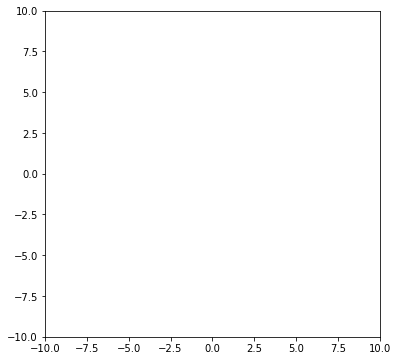

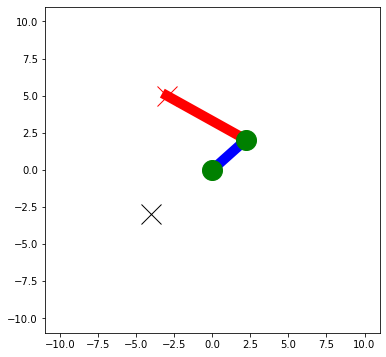

In [8]:
# Straght-line kinematics linear acceleration
pos_init, pos_des, L, plot_range, angle_init, \
angle_des, pos, e, e_prev, pos_dot, t, e_sum,\
t_plot, pos1_plot, pos2_plot, dt = initialize_parameters_linear()

is_given_inputs_feasible(pos_init, pos_des, L)
fig, ax, camera = create_animation_frame(plot_range)

#Define N points in a straight line    
pos_init, pos_des, L, plot_range, angle_init, \
angle_des, theta, e, e_prev, theta_dot, t, e_sum,\
t_plot, angle1_plot, angle2_plot, dt = initialize_parameters()
# is_given_inputs_feasible(pos_init, pos_des, L)
fig, ax, camera = create_animation_frame(plot_range)
N=50
print(angle_init)
print(from_pos_to_angle(pos_des, L))
pos_des_local = pos_init + (pos_des-pos_init) * (1) / N
angle_des = from_pos_to_angle(pos_des_local, L)

for i in range(N):
    theta = angle_des
    robot_animation(L, theta)
    angle_init = angle_des
    print(angle_init)
    pos_des_local = pos_init + (pos_des-pos_init) * (i+2) / N
    angle_des = from_pos_to_angle(pos_des_local, L)

animation = camera.animate(interval=20) # animation ready
animation.save('sample_video_from_python_script.gif')
HTML(animation.to_html5_video()) # displaying the animation

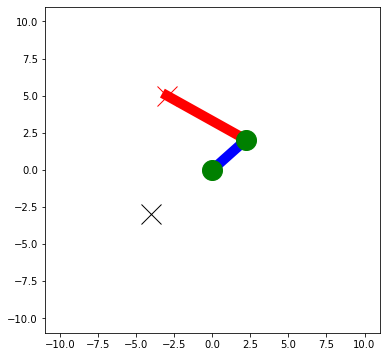

In [9]:
# Control via angular acceleration

pos_init, pos_des, L, plot_range, angle_init, \
angle_des, theta, e, e_prev, theta_dot, t, e_sum,\
t_plot, angle1_plot, angle2_plot, dt = initialize_parameters()
# is_given_inputs_feasible(pos_init, pos_des, L)
fig, ax, camera = create_animation_frame(plot_range)


# Control loop
while np.linalg.norm(e) > 0.001 :
    theta_ddot = - PID(e_prev, e, dt) # Why negative?
    theta, e, e_prev = update(angle_init, angle_des, theta, theta_ddot, theta_dot, e, e_prev)
    t += dt
    t_plot.append(t)
    angle1_plot.append(theta[0])
    angle2_plot.append(theta[1])
    # plot for an animation
    robot_animation(L, theta)

animation = camera.animate(interval=10) # animation ready
animation.save('test_control.gif')
HTML(animation.to_html5_video()) # displaying the animation
    
    

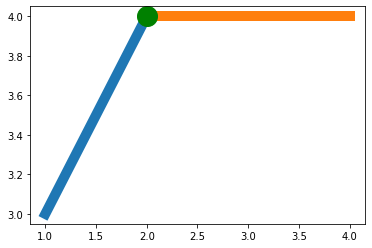

In [386]:
plt.plot([1,2],[3,4],linewidth=10)
plt.plot([2,4],[4,4],linewidth=10)
plt.plot(2,4,'go',markersize=20)